<a href="https://colab.research.google.com/github/Reina0419/BSIS2A-CANAOAY-REINA-GRACE-/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Reina0419/BSIS2A-CANAOAY-REINA-GRACE-/refs/heads/main/student_grades_dataset%20(1).csv')

In [ ]:
df.describe()

,Student_ID,Study_Hours,Attendance_Percentage,Quiz_Average,Final_Grade
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,9.933434,74.891586,75.880067,49.554008
std,29.011492,5.652299,14.655563,14.671312,8.306661
min,1.000000,1.104920,50.347607,50.253079,29.071858
25%,25.750000,4.670814,62.100226,63.843993,43.787599
50%,50.500000,9.818707,75.281243,78.127747,49.778791
75%,75.250000,14.873859,88.309180,87.618347,56.605490
max,100.000000,19.750852,99.282523,99.502693,67.636659


In [ ]:
df.mean()

,0
Student_ID,50.500000
Study_Hours,9.933434
Attendance_Percentage,74.891586
Quiz_Average,75.880067
Final_Grade,49.554008


In [ ]:
df.median()

,0
Student_ID,50.500000
Study_Hours,9.818707
Attendance_Percentage,75.281243
Quiz_Average,78.127747
Final_Grade,49.778791


In [ ]:
df.min()

,0
Student_ID,1.000000
Study_Hours,1.104920
Attendance_Percentage,50.347607
Quiz_Average,50.253079
Final_Grade,29.071858


In [ ]:
df.max()

,0
Student_ID,100.000000
Study_Hours,19.750852
Attendance_Percentage,99.282523
Quiz_Average,99.502693
Final_Grade,67.636659


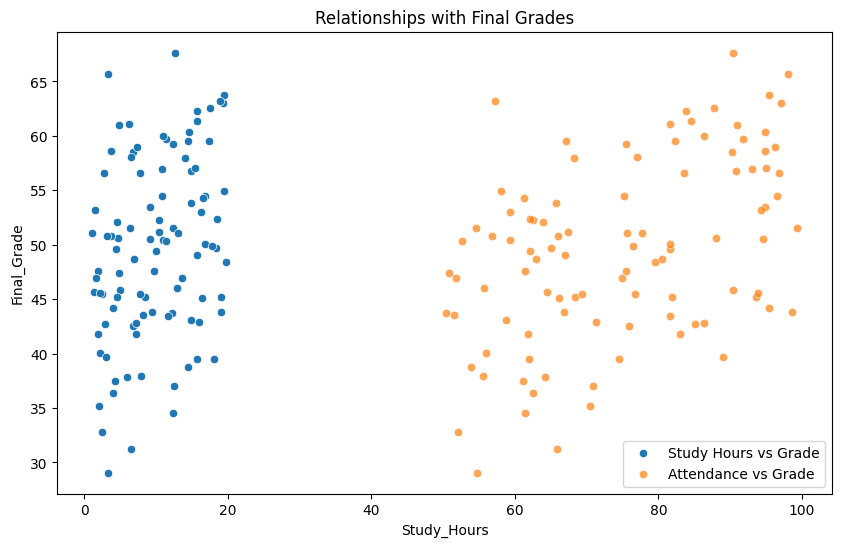

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours', y='Final_Grade', data=df, label="Study Hours vs Grade") # Changed 'data' to 'df'
sns.scatterplot(x='Attendance_Percentage', y='Final_Grade', data=df, label="Attendance vs Grade", alpha=0.7)
plt.legend()
plt.title("Relationships with Final Grades")
plt.show()

In [ ]:
df.dropna()

,Student_ID,Study_Hours,Attendance_Percentage,Quiz_Average,Final_Grade
0,1,8.116262,51.571459,82.101582,43.576277
1,2,19.063572,81.820521,54.206998,45.175683
2,3,14.907885,65.717799,58.081436,53.822645
3,4,12.374511,75.428535,94.927709,59.226273
4,5,3.964354,95.378324,80.321453,44.169962
...,...,...,...,...,...
95,96,10.382116,67.460479,76.112163,51.182953
96,97,10.931924,86.297784,88.499678,59.932607
97,98,9.123279,94.855513,60.791051,53.485009
98,99,1.482963,94.354321,81.144524,53.181605


In [ ]:
scaler = StandardScaler()
X = df[['Study_Hours', 'Attendance_Percentage', 'Quiz_Average']]
X_scaled = scaler.fit_transform(X)

In [ ]:
y = df['Final_Grade']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
def predict_grade(study_hours, attendance, quiz_average):
    new_data = scaler.transform([[study_hours, attendance, quiz_average]])
    predicted_grade = model.predict(new_data)
    return predicted_grade[0]

In [ ]:
hypothetical_study_hours = 10
hypothetical_attendance = 80
hypothetical_quiz_average = 75
predicted_grade = predict_grade(hypothetical_study_hours, hypothetical_attendance, hypothetical_quiz_average)
print(f"Predicted Final Grade: {predicted_grade}")

Predicted Final Grade: 51.970178694683256


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


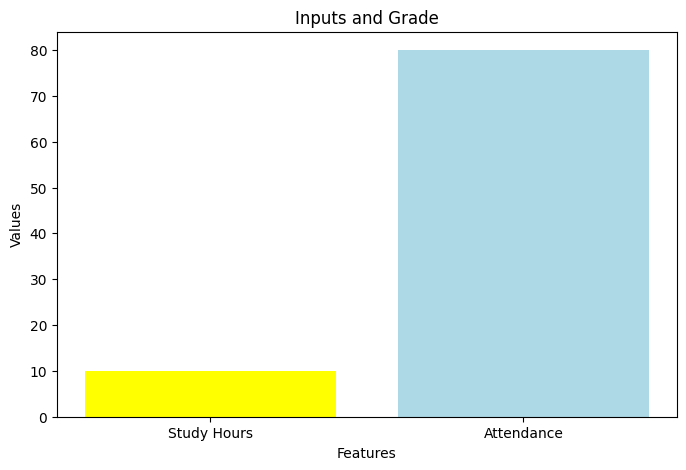

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(['Study Hours', 'Attendance'], [hypothetical_study_hours, hypothetical_attendance], color=['yellow', 'lightblue'])
plt.title('Inputs and Grade')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

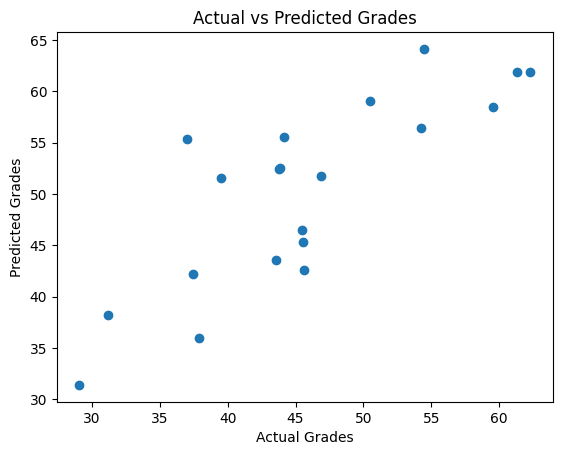

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Grades")
plt.show()